In [0]:
import torch
import torch.nn as nn

Equation:
y = a1x1+a2 = a1x1 + a2x2, where x2 is a vector of ones.

In [0]:
n = 200                 #Total number of data points 

In [0]:
x = torch.ones(n, 2)      #Tensor of n*2, a rank 2 tensor

In [54]:
x[0:5]               #First column x1, second column x2     

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [55]:
x[:,0].uniform_(-1, 1)    #Uniform distribution of random values between -1 and 1 input in the place of the first column (x1)
x[0:5]

tensor([[ 0.0505,  1.0000],
        [ 0.3855,  1.0000],
        [-0.1043,  1.0000],
        [-0.2934,  1.0000],
        [-0.6030,  1.0000]])

In [56]:
a = torch.tensor([3.,2.0]); a #A rank 1 tensor, 3 represents a1, 2 represents a2

tensor([3., 2.])

In [0]:
y = x@a + torch.rand(n)       #y = a1x1 +  a2x2 (matrix multiplication of a and x) with the addition of some noise for n number of elements from torch.rand(n)

In [58]:
y[0:3]                        #A rank 1 tensor. A vector of y values for the different points

tensor([2.6425, 4.0185, 2.0452])

In [0]:
import matplotlib.pyplot as plt

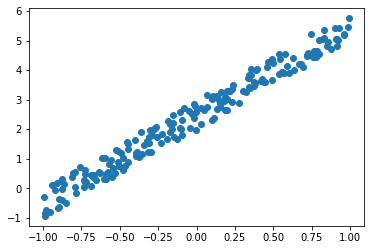

In [60]:
plt.scatter(x[:,0], y)        #The second column of x is useless as it contains only ones which were used to make matric vector multiplication easier for us

a is a coefficient/parameter/weight we do not know normally. In the current case we defined it to understand how SGD and neural nets work. Our primary purpose is to best approximate the value of a. So, moving forward we will assume that we do not have the value of a.

In [0]:
#Mean Sqaured Error function to find the loss
def mse(y_hat, y):          #y_hat is the prediction
  return ((y_hat-y)**2).mean()      #Defintion of MSE


In [62]:
#If we assume or guess that a = (1.0,1.0)
a = torch.tensor([-1.,-1.])
a

tensor([-1., -1.])

In [0]:
y_hat = x@a       #our prediction for y, y_hat will be x*a

In [64]:
mse(y_hat, y)     #The mean sqaured error find the loss for this prediction

tensor(16.4461)

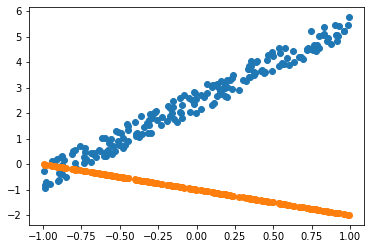

In [65]:
plt.scatter(x[:,0], y)          #Represents the dataset
plt.scatter(x[:,0], y_hat)      #Represents the supposed best fit line (which i not accurate)

# ***Gradient Descent:***
It is the way to minimize the loss function

In [66]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1., -1.], requires_grad=True)

In [0]:
def update():             #Updating the weight
  y_hat = x@a
  loss = mse(y_hat, y)
  if t%5==0:
    print(loss)
  loss.backward()
  with torch.no_grad():
    a.sub_(lr * a.grad)
    a.grad.zero_()

In [68]:
lr = 1e-1
for t in range(100):
  update()

tensor(16.4461, grad_fn=<MeanBackward0>)
tensor(4.0309, grad_fn=<MeanBackward0>)
tensor(1.6446, grad_fn=<MeanBackward0>)
tensor(0.8403, grad_fn=<MeanBackward0>)
tensor(0.4692, grad_fn=<MeanBackward0>)
tensor(0.2815, grad_fn=<MeanBackward0>)
tensor(0.1845, grad_fn=<MeanBackward0>)
tensor(0.1342, grad_fn=<MeanBackward0>)
tensor(0.1081, grad_fn=<MeanBackward0>)
tensor(0.0945, grad_fn=<MeanBackward0>)
tensor(0.0875, grad_fn=<MeanBackward0>)
tensor(0.0838, grad_fn=<MeanBackward0>)
tensor(0.0819, grad_fn=<MeanBackward0>)
tensor(0.0809, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0802, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)


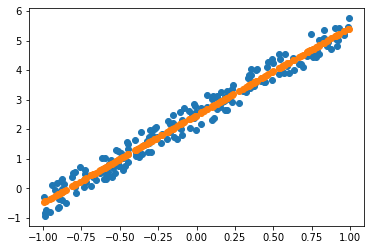

In [69]:
a = a.detach().numpy()
plt.scatter(x[:,0], y) 
plt.scatter(x[:,0], x@a)